In [43]:
# bibliotecas utilizadas
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def totalClassesPics(faces, filename) -> None:  # totalizando qntd de pessoas e rostos
    classes = set(filename.split("/")[0] for filename in faces.keys())
    print("Number of classes:", len(classes))
    print("Number of faces:", len(faces))

In [45]:
def findPixelImg(faces) -> None: # encontrando o pixel de uma imagem especifica
    faceshape = list(faces.values())[0].shape
    print("Face image shape:", faceshape)
    print("Image:", list(faces.keys())[0])

In [46]:
def pltFaces(faces) -> None:  # exibe imagens
    fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 10))
    faceimgs = list(faces.values())[-16:]  # guarda as ultimas 16 imagens

    for i in range(len(faceimgs)):
        axes[i % 4][i//4].imshow(faceimgs[i], cmap="gray")
    plt.show()


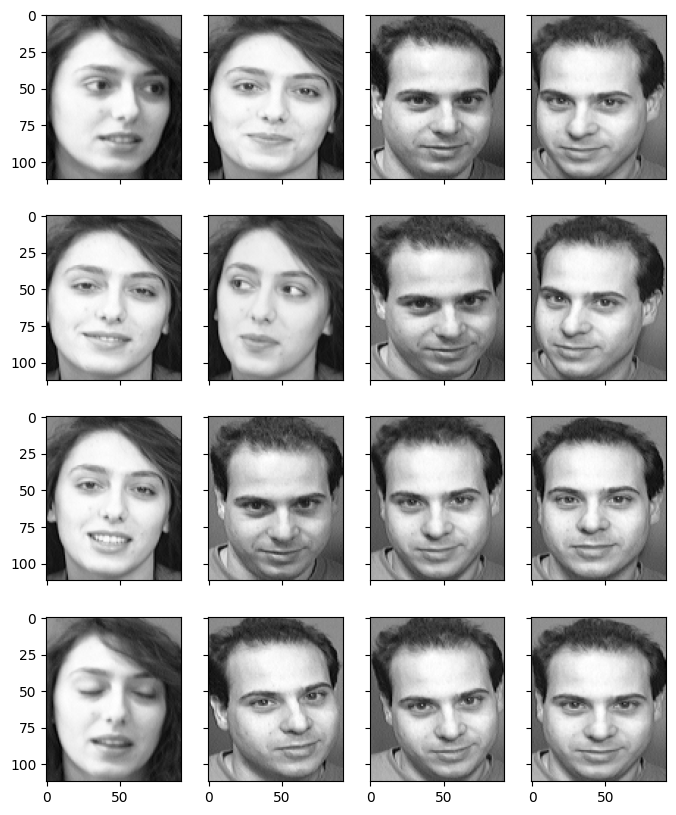

Face image shape: (112, 92)
Image: s1/1.pgm
Number of classes: 40
Number of faces: 400


In [47]:
def main():
    faces = {}  # dicionario com as imagens

    # abrindo o zipfile c as imagens
    with zipfile.ZipFile("../dataset/attface.zip") as facezip:
        for filename in facezip.namelist():
            if not filename.endswith(".pgm"):
                continue  # nao eh uma imagem
            with facezip.open(filename) as img:  # extracao da imagem
                faces[filename] = cv2.imdecode(np.frombuffer(
                    img.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
    pltFaces(faces)
    findPixelImg(faces)
    totalClassesPics(faces,filename)


if __name__ == '__main__':
    main()
